In [2]:
% matplotlib qt5
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 20})
import numpy as np
import os
from skimage import io
from skimage.filters import threshold_otsu
from skimage.feature import corner_foerstner
from skimage.morphology import skeletonize

from scipy import misc
from scipy import ndimage

CCD_AREA = 0.08602 #cm^2
IMG_PIXELS = 350208


img = io.imread("/home/pawel1/Pulpit/Studia/Python/Speckle/E10/Dzien4/1T04633I.BMP")

img = img[100:300, 300:450]
threshold = img.mean()
speckle_pixel = np.sum(np.sum(img > threshold))

eroded_square = ndimage.binary_erosion(img)
reconstruction = ndimage.binary_propagation(eroded_square, mask=img)


fig, axes = plt.subplots(ncols=3, figsize=(8, 4.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(img, cmap=plt.cm.gray)
ax[1].imshow(img > threshold, cmap=plt.cm.gray)
ax[2].imshow(reconstruction)

w, q = corner_foerstner(img)

plt.show()

equation:
$$\log N!\simeq N\log N - N $$
\begin{equation}
\log N!\simeq N\log N - N
\end{equation}

In [3]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax1.set_adjustable('box-forced')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')
    ax2.set_adjustable('box-forced')

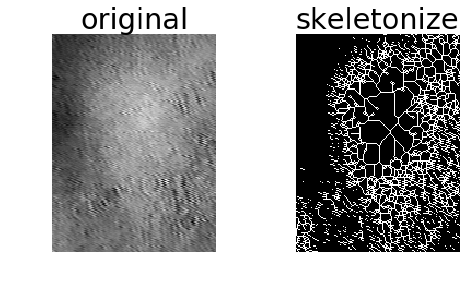

In [9]:
sk = skeletonize(img > threshold)
plot_comparison(img, sk, 'skeletonize')

In [ ]:
os.getcwd()